<a href="https://colab.research.google.com/github/anirudhrecharla/CODSOFT/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2 - CREDIT CARD FRAUD DETECTION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
train = pd.read_csv('/content/fraudTrain.csv')
test = pd.read_csv('/content/fraudTest.csv')

In [ ]:
data = pd.concat([train, test])

In [ ]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,287410.000000,2.874100e+05,287409.000000,287409.000000,287409.000000,287408.000000,2.874080e+05,2.874080e+05,287408.000000,287408.000000,287408.000000
mean,71903.519098,4.181637e+17,70.703903,48790.981820,38.542982,-90.207892,8.905435e+04,1.352042e+09,38.543278,-90.208400,0.006788
std,41573.238547,1.309993e+18,153.382821,26886.938989,5.070280,13.746818,3.015464e+05,2.263138e+07,5.104988,13.759296,0.082111
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.671575,0.000000
25%,35926.000000,1.800429e+14,9.670000,26237.000000,34.668900,-96.798000,7.430000e+02,1.329002e+09,34.755022,-96.887829,0.000000
50%,71852.000000,3.519607e+15,47.730000,48174.000000,39.371600,-87.461600,2.443000e+03,1.371907e+09,39.375222,-87.416429,0.000000
75%,107778.000000,4.635331e+15,83.450000,72011.000000,41.894800,-80.158000,2.047800e+04,1.374089e+09,41.955846,-80.232334,0.000000
max,147552.000000,4.992346e+18,13149.150000,99783.000000,65.689900,-67.950300,2.906700e+06,1.376229e+09,66.669356,-66.952352,1.000000


In [ ]:
print(train.shape)
print(test.shape)

(139857, 23)
(147553, 23)


In [ ]:
display(data.head())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,1
category,1
amt,1
first,1
last,1
gender,1
street,1


In [ ]:
test.info

<bound method DataFrame.info of         Unnamed: 0 trans_date_trans_time               cc_num  \
0                0   2020-06-21 12:14:25     2291163933867244   
1                1   2020-06-21 12:14:33     3573030041201292   
2                2   2020-06-21 12:14:53     3598215285024754   
3                3   2020-06-21 12:15:15     3591919803438423   
4                4   2020-06-21 12:15:17     3526826139003047   
...            ...                   ...                  ...   
147548      147548   2020-08-11 13:43:41      377993105397617   
147549      147549   2020-08-11 13:43:52      213157767990030   
147550      147550   2020-08-11 13:44:13     4449530933957323   
147551      147551   2020-08-11 13:44:26        4681699462969   
147552      147552   2020-08-11 13:44:32  4742883543039288059   

                                    merchant        category     amt  \
0                      fraud_Kirlin and Sons   personal_care    2.86   
1                       fraud_Sporer-Keebler   personal_care   29.84   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28   
3                          fraud_Haley Group        misc_pos   60.05   
4                      fraud_Johnston-Casper          travel    3.19   
...                                      ...             ...     ...   
147548          fraud_Cole, Hills and Jewess            home  128.64   
147549           fraud_Breitenberg-Hermiston       kids_pets   14.18   
147550                     fraud_Streich Ltd            home   81.54   
147551                 fraud_Lubowitz-Walter       kids_pets   63.38   
147552                      fraud_Herzog Ltd        misc_pos    7.16   

            first      last gender                       street  ...      lat  \
0            Jeff   Elliott      M            351 Darlene Green  ...  33.9659   
1          Joanne  Williams      F             3638 Marsh Union  ...  40.3207   
2          Ashley     Lopez      F         9333 Valentine Point  ...  40.6729   
3           Brian  Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697   
4          Nathan    Massey      M     5783 Evan Roads Apt. 465  ...  44.2529   
...           ...       ...    ...                          ...  ...      ...   
147548     Nathan  Martinez      M            586 Thomas Cliffs  ...  44.8755   
147549       Tara  Campbell      F   05050 Rogers Well Apt. 439  ...  41.6060   
147550    Felicia     Mckee      F           84079 Thomas Burgs  ...  38.2427   
147551     Joseph  Gonzalez      M     319 Wendy Fort Suite 179  ...  35.8596   
147552  Cassandra   Sanders      F       78117 George Mountains  ...  20.0271   

            long  city_pop                        job         dob  \
0       -80.9355  333497.0        Mechanical engineer  1968-03-19   
1      -110.4360     302.0     Sales professional, IT  1990-01-17   
2       -73.5365   34496.0          Librarian, public  1970-10-21   
3       -80.8191   54767.0               Set designer  1987-07-25   
4       -85.0170    1126.0         Furniture designer  1955-07-06   
...          ...       ...                        ...         ...   
147548  -88.1555    5548.0            Mining engineer  1975-09-11   
147549 -109.2300   27971.0            Music therapist  1984-08-01   
147550 -122.9145     337.0  Occupational psychologist  1954-07-05   
147551  -86.4210  158701.0      Journalist, newspaper  1978-03-06   
147552       NaN       NaN                        NaN         NaN   

                               trans_num     unix_time  merch_lat  merch_long  \
0       2da90c7d74bd46a0caf3777415b3ebd3  1.371817e+09  33.986391  -81.200714   
1       324cc204407e99f51b0d6ca0055005e7  1.371817e+09  39.450498 -109.960431   
2       c81755dbbbea9d5c77f094348a7579be  1.371817e+09  40.495810  -74.196111   
3       2159175b9efe66dc301f149d3d5abf8c  1.371817e+09  28.812398  -80.883061   
4       57ff021bd3f328f8738bb535c302a31b  1.371817e+09  44.959148  -85.884734   
...                               

In [ ]:
train.info

<bound method DataFrame.info of         Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2019-01-01 00:00:18  2703186189652095   
1                1   2019-01-01 00:00:44      630423337322   
2                2   2019-01-01 00:00:51    38859492057661   
3                3   2019-01-01 00:01:16  3534093764340240   
4                4   2019-01-01 00:03:06   375534208663984   
...            ...                   ...               ...   
139852      139852   2019-03-17 12:31:24    38530489946071   
139853      139853   2019-03-17 12:31:41    30143713661454   
139854      139854   2019-03-17 12:32:06   180048185037117   
139855      139855   2019-03-17 12:33:20  3589289942931264   
139856      139856   2019-03-17 12:33:25    21317548710644   

                                  merchant       category     amt      first  \
0               fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1          fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                     fraud_Lind-Buckridge  entertainment  220.11     Edward   
3       fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                      fraud_Keeling-Crist       misc_pos   41.96      Tyler   
...                                    ...            ...     ...        ...   
139852               fraud_Brown-Greenholt  entertainment    3.09      Laura   
139853              fraud_Heaney-Marquardt  entertainment   46.76   Nicholas   
139854               fraud_Lubowitz-Walter      kids_pets   23.46       Mary   
139855                  fraud_Kassulke Inc  entertainment  251.66      Paula   
139856                                 NaN            NaN     NaN        NaN   

            last gender                        street  ...      lat      long  \
0          Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1           Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2        Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3          White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4         Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   
...          ...    ...                           ...  ...      ...       ...   
139852     Johns      F              95835 Garcia Rue  ...  34.9572  -81.9916   
139853  Thornton      M     5270 Megan Burg Suite 756  ...  48.6669  -96.5969   
139854      Wall      F               2481 Mills Lock  ...  40.6152  -74.4150   
139855   Estrada      F               350 Stacy Glens  ...  43.7557  -97.5936   
139856       NaN    NaN                           NaN  ...      NaN       NaN   

        city_pop                                    job         dob  \
0         3495.0              Psychologist, counselling  1988-03-09   
1          149.0      Special educational needs teacher  1978-06-21   
2         4154.0            Nature conservation officer  1962-01-19   
3         1939.0                        Patent attorney  1967-01-12   
4           99.0         Dance movement psychotherapist  1986-03-28   
...          ...                                    ...         ...   
139852     530.0                    Animal technologist  1989-05-14   
139853     140.0                 Embryologist, clinical  1942-01-06   
139854   71485.0                 Leisure centre manager  1974-07-19   
139855     343.0  Development worker, international aid  1972-03-05   
139856       NaN                                    NaN         NaN   

                               trans_num     unix_time  merch_lat  merch_long  \
0       0b242abb623afc578575680df30655b9  1.325376e+09  36.011293  -82.048315   
1       1f76529f8574734946361c461b024d99  1.325376e+09  49.159047 -118.186462   
2       a1a22d70485983eac12b5b88dad1cf95  1.325376e+09  43.150704 -112.154481   
3       6b849c168bdad6f867558c3793159a81  1.325376e+09  47.034331 -112.561071   
4       a41d7549acf90789359a9aa

# Converting Categorical Data to Numerical Data using Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
label_encode_cols = ['merchant', 'category', 'gender','state','job']
for col in label_encode_cols:
  le=LabelEncoder()
  data[col] = le.fit_transform(data[col])
  label_encoders[col] = le

  train[col] = le.fit_transform(train[col])
  label_encoders[col] = le

  test[col] = le.fit_transform(test[col])
  label_encoders[col] = le

In [ ]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])

In [ ]:
data['transaction_year'] = data['trans_date_trans_time'].dt.year
data['transaction_month'] = data['trans_date_trans_time'].dt.month
data['transaction_day'] = data['trans_date_trans_time'].dt.day
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour

In [ ]:
data['birth_year'] = data['dob'].dt.year
data['birth_month'] = data['dob'].dt.month
data['birth_day'] = data['dob'].dt.day
data.drop(['trans_date_trans_time','dob'],axis=1,inplace=True)
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
train['dob'] = pd.to_datetime(train['dob'])

In [ ]:
train['trancation_year'] = train['trans_date_trans_time'].dt.year
train['trancation_month'] = train['trans_date_trans_time'].dt.month
train['trancation_day'] = train['trans_date_trans_time'].dt.day
train['trancation_hour'] = train['trans_date_trans_time'].dt.hour

train['birth_year'] = train['dob'].dt.year
train['birth_month'] = train['dob'].dt.month
train['birth_day'] = train['dob'].dt.day

In [ ]:
train.drop(['trans_date_trans_time','dob'],axis=1,inplace=True)

In [ ]:
test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])
test['dob'] = pd.to_datetime(test['dob'])

In [ ]:
test['transactions_year'] = test['trans_date_trans_time'].dt.year
test['transactions_month'] = test['trans_date_trans_time'].dt.month
test['transactions_day'] = test['trans_date_trans_time'].dt.day
test['transactions_hour'] = test['trans_date_trans_time'].dt.hour
test['birth_year'] = test['dob'].dt.year
test['birth_month'] = test['dob'].dt.month
test['birth_day'] = test['dob'].dt.day

In [ ]:
test.drop(['trans_date_trans_time','dob'],axis=1,inplace=True)

In [ ]:
data.drop(['first','last','street','city','state','zip','lat','long','city_pop','job','trans_num','unix_time'],axis=1,inplace=True)
train.drop(['first','last','street','city','state','zip','lat','long','city_pop','job','trans_num','unix_time'],axis=1,inplace=True)
test.drop(['first','last','street','city','state','zip','lat','long','city_pop','job','trans_num','unix_time'],axis=1,inplace=True)

In [ ]:
train.shape

(139857, 16)

In [ ]:
test.shape

(147553, 16)

In [ ]:
data.shape

(287410, 16)

In [ ]:
print(data.head())
print(data.describe())
print(data.isnull().sum())

   Unnamed: 0            cc_num  merchant  category     amt  gender  \
0           0  2703186189652095       514         8    4.97       0   
1           1      630423337322       241         4  107.23       0   
2           2    38859492057661       390         0  220.11       1   
3           3  3534093764340240       360         2   45.00       1   
4           4   375534208663984       297         9   41.96       1   

   merch_lat  merch_long  is_fraud  transaction_year  transaction_month  \
0  36.011293  -82.048315       0.0              2019                  1   
1  49.159047 -118.186462       0.0              2019                  1   
2  43.150704 -112.154481       0.0              2019                  1   
3  47.034331 -112.561071       0.0              2019                  1   
4  38.674999  -78.632459       0.0              2019                  1   

   transaction_day  transaction_hour  birth_year  birth_month  birth_day  
0                1                 0      1988.

# 2.Data Visualization: Fraudulent Transaction Distribution

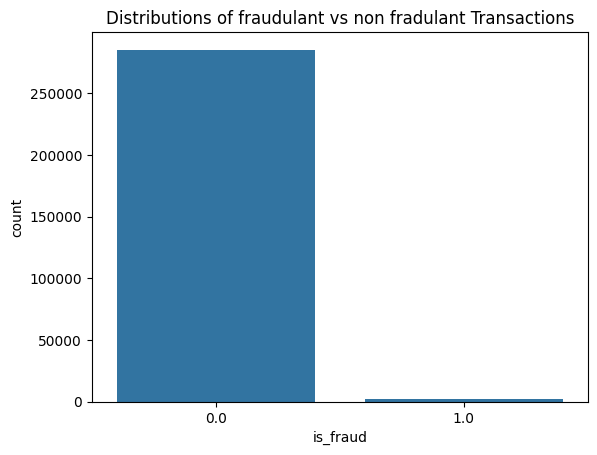

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data = data.reset_index(drop=True)

sns.countplot(data=data, x='is_fraud')
plt.title('Distributions of fraudulant vs non fradulant Transactions')
plt.show()

In [ ]:
data.index.duplicated().sum()
data = data.reset_index(drop=True)
data.index.duplicated().sum()

np.int64(0)

# 3.Visualizing Fraudulent Transactions by Category

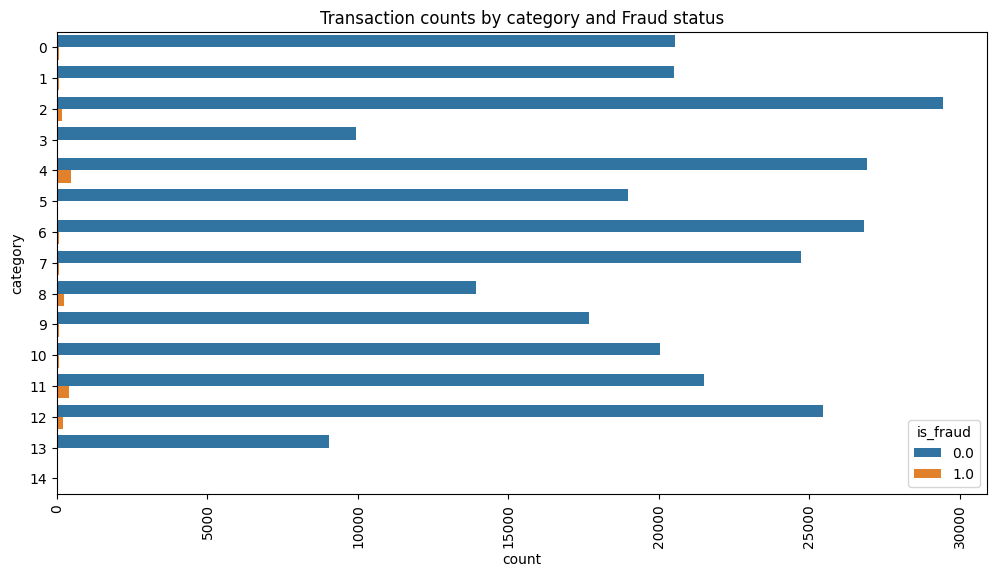

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,y='category',hue='is_fraud')
plt.title('Transaction counts by category and Fraud status')
plt.xticks(rotation=90)
plt.show()

# 4.Visualizing Fraudulent Transactions by Gender

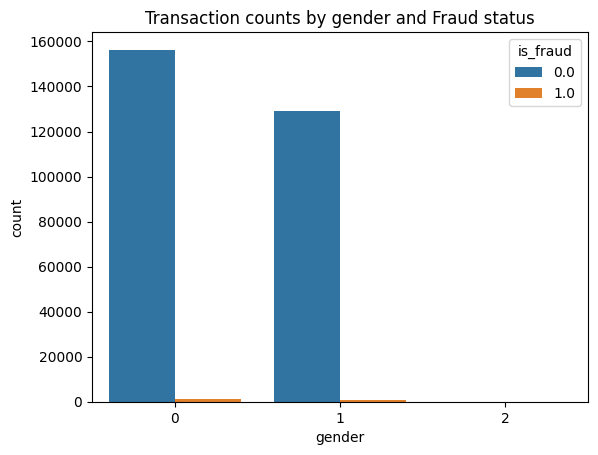

In [ ]:
sns.countplot(data=data,x='gender',hue='is_fraud')
plt.title('Transaction counts by gender and Fraud status')
plt.show()

# 5.Training and Evaluating a Logistic Regression Model

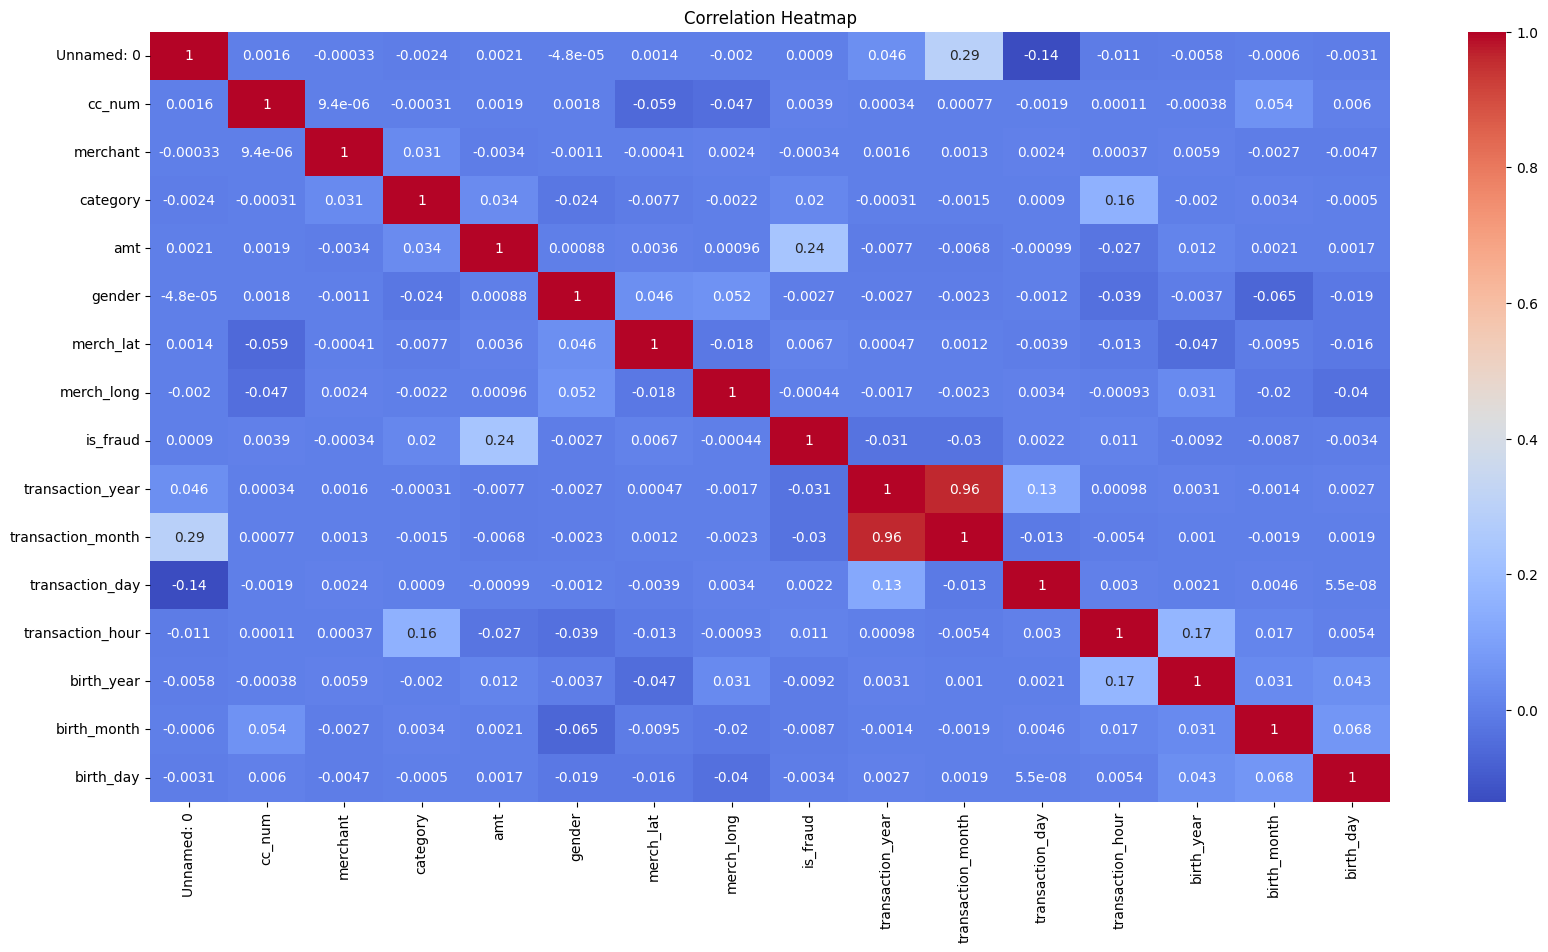

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
x = data.drop('is_fraud',axis=1)
y = data['is_fraud']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train = x_train.dropna()
x_test = x_test.dropna()

In [ ]:
y_train = y_train.loc[x_train.index]
y_test = y_test.loc[x_test.index]

In [ ]:
#Training the model for logisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train, y_train)
y_pred = log_model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     57092
         1.0       0.00      0.00      0.00       389

    accuracy                           0.99     57481
   macro avg       0.50      0.50      0.50     57481
weighted avg       0.99      0.99      0.99     57481

[[57092     0]
 [  389     0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 6.Training and Evaluating a Decision Tree Model

In [ ]:
#Training model with DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

[[56995    97]
 [   83   306]]
Accuracy: 0.9968685304709383


# 7.Training and Evaluating a Logistic Regression Model

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     57092
         1.0       0.00      0.00      0.00       389

    accuracy                           0.99     57481
   macro avg       0.50      0.50      0.50     57481
weighted avg       0.99      0.99      0.99     57481

[[57092     0]
 [  389     0]]
Accuracy: 0.9932325464066387


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
